<a href="https://colab.research.google.com/github/rnlchr/CPE311/blob/main/Hands_on_Activity_5_1_Clustering__Castillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 5.1: Clustering

#### Objective:

This activity aims to perform classification  of unlabeled data using K Means and Agglomerative Clustering

#### Intended Learning Outcomes (ILOs):
* Build the model using K Means and Agglomerative clustering.
* Determine the optimum number of clusters using elbow method.
* Visualize the dendogram produced by the agglomerative clustering


#### Resources:
* Jupyter Notebook
* Wholesale customers data.csv

#### Procedure:

We will used K-Means clustering to cluster the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.


Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Load the dataset and check the first five rows

In [2]:
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Check the descriptive statistics of the dataset

In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Since K-Means is a distance-based algorithm, the difference between the magnitudes of the data will create a problem. Let us apply featuring scaling to standardize the data.

In [4]:
# Use standard scaler to standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Build the K-Means model

In [5]:
# Create cluster of 2
kmeans = KMeans(n_clusters=2, init='k-means++')

# fit the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

 Calculate the inertia to evaluate how well the formed clusters are.

In [6]:
# inertia on the fitted data
kmeans.inertia_

2599.387384912305

Interpret the result of the inertia

Lower inertia means smaller clusters are to be formed, but that doesn't mean that it is the best for determining the number of clusters that are to be formed. With the given output, as well as considering the amount of data that our dataset contains, We are going to be given larger clusters, but we are not certain with the number of clusters that are about to be formed


Use the elbow curve to determine the optimum number of clusters in Python.



Text(0, 0.5, 'Inertia')

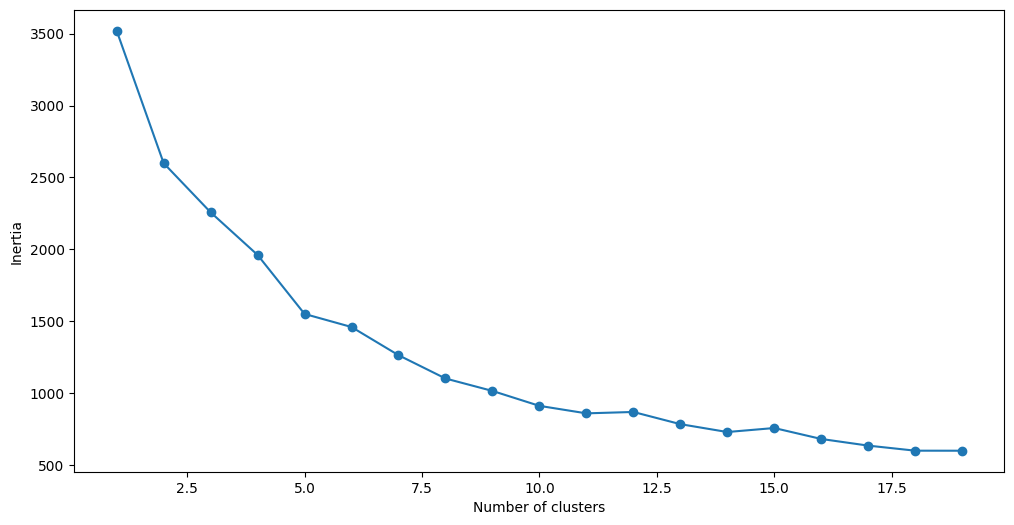

In [8]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Interpret the result of the elbow curve.

The elbow curve method basically shows the number of formed clusters as the value of k goes up. Doing this method helps us determine whats the best K value to use. The best K value would be the start of the curve where the pace of the decreasing clusters start to slow down, in this case it would be the value of 1500 with 5.0 clusters.

Build a model using 5 clusters and k-means ++ initialization

In [11]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [12]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

,count
cluster,
4,172
2,124
3,86
1,46
0,12


There are 208 data points belonging to cluster 1 (index 1), then 125 points in cluster 2 (index 2), and so on.

Compute the centroids of the K means cluster

In [13]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.2704059   0.05191612  0.52023633  4.04575316  3.79377714  0.60785211
   3.82770154  2.23637004]
 [-0.55080043  0.3095802   1.86860622 -0.12690591 -0.25696359  1.42079094
  -0.41834517  0.40277833]
 [ 1.44865163  0.16314237 -0.34730795  0.42831725  0.66670239 -0.35596759
   0.69225733  0.00510761]
 [-0.5908111  -1.58939862 -0.1173699  -0.35099229 -0.40274118  0.01335132
  -0.42274757 -0.16201575]
 [-0.69029709  0.59066829 -0.22696933 -0.38161261 -0.47523463 -0.17243512
  -0.44286139 -0.18641996]]


What is the purpose of the centroids?

Centroids are basically the coordinates of the center value of each cluster. Basically being a data point representing the average location of all the data points within its assigned cluster.

Fit an agglomerative clustering model with two clusters.

In [14]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data_scaled)
df['agglom'] = ag.fit_predict(data_scaled)

Visualize the dendrogram produced by agglomerative clustering

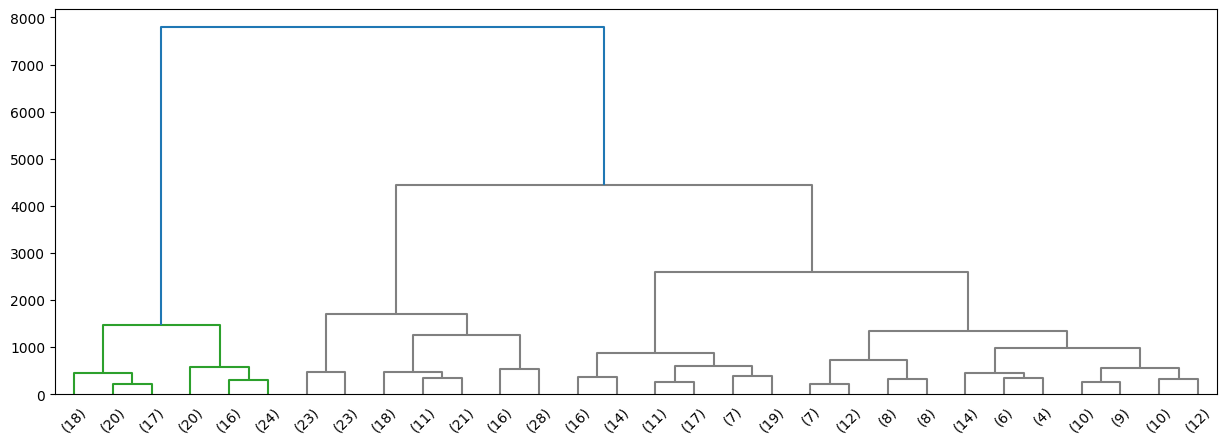

In [15]:
from scipy.cluster import hierarchy
from matplotlib import colors
import seaborn as sns

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top',
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

Interpret the result of the dendogram

Dendrograms are visual representations of the hierarchical clustering process. Each leaf represents a data point, the vertical lines represent merging clusters, and the height of the horizontal lines are the distances between the clusters that merged. Longer vertical lines, larger distances.

in the graph being given, the data points are grouped together progressively. We can also see that the clusters are formed at different distances, and the larger their distance the less clusters are present.

Supplementary Activity:
* Choose your own dataset.
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Standardize the variables.
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Use k-means clustering to identify the groups of the dataset.
* Use 1 to 10 clusters
* Determine the optimum number of clusters
* Use agglomerative clustering and visualize the dendogram
* Compare the results obtained by the K means and agglomerative clustering.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath= pd.read_csv('/content/diabetes (1).csv')
data= filepath
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from matplotlib import colors
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/diabetes (1).csv')

# Data Exploration
print("Number of data points:", data.shape[0])

Number of data points: 768


In [21]:
print("Number of columns:", data.shape[1])

Number of columns: 9


In [22]:
print("Data types:\n", data.dtypes)

Data types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [24]:
# Data Cleaning (Example: Removing rows with missing values)
data.dropna(inplace=True)

In [25]:
# Assuming 'SkinThickness', 'Insulin','BMI' can't be zero
for col in ['SkinThickness', 'Insulin','BMI']:
    data[col].replace(0,np.nan,inplace=True)
    data[col] = data[col].fillna(data[col].mean())

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

<ipython-input-25-9a608cc2f64a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(0,np.nan,inplace=True)


In [26]:
# Descriptive Statistics
print("\nDescriptive Statistics:\n", data.describe())


Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      29.153420  155.548223   
std       3.369578   31.972618      19.355807       8.790942   85.021108   
min       0.000000    0.000000       0.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     1

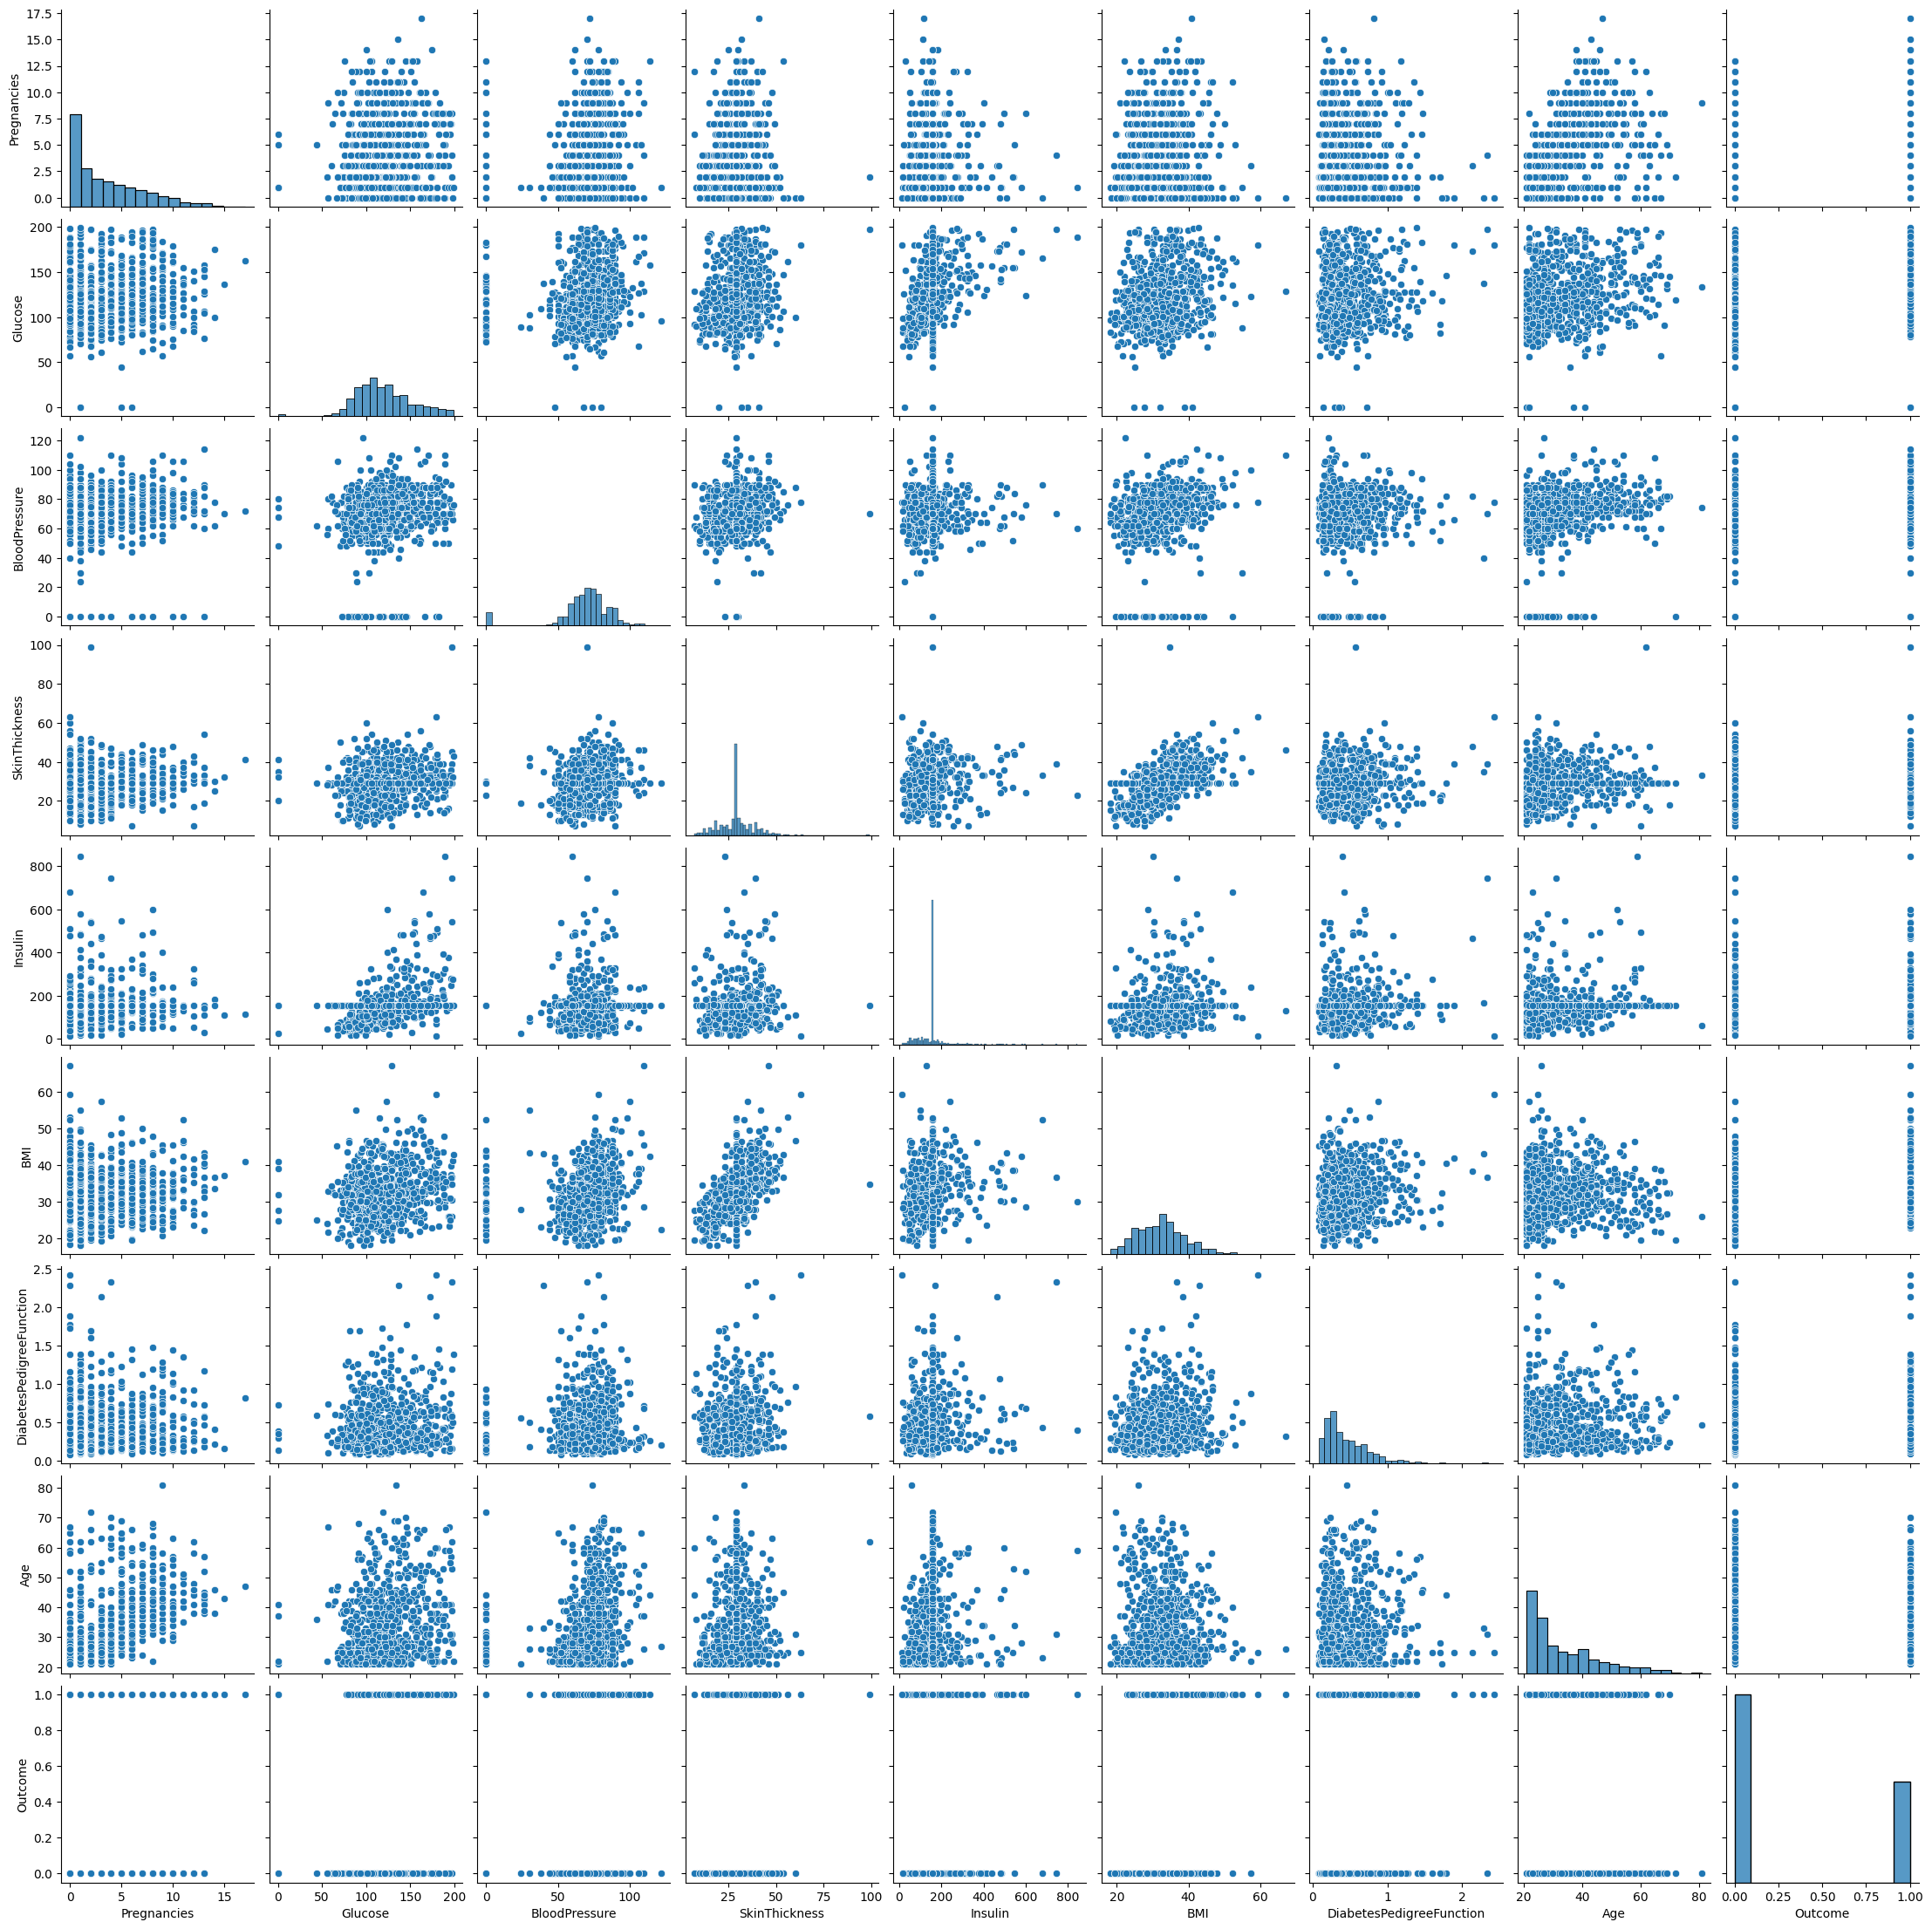

In [27]:
sns.pairplot(data)
plt.show()

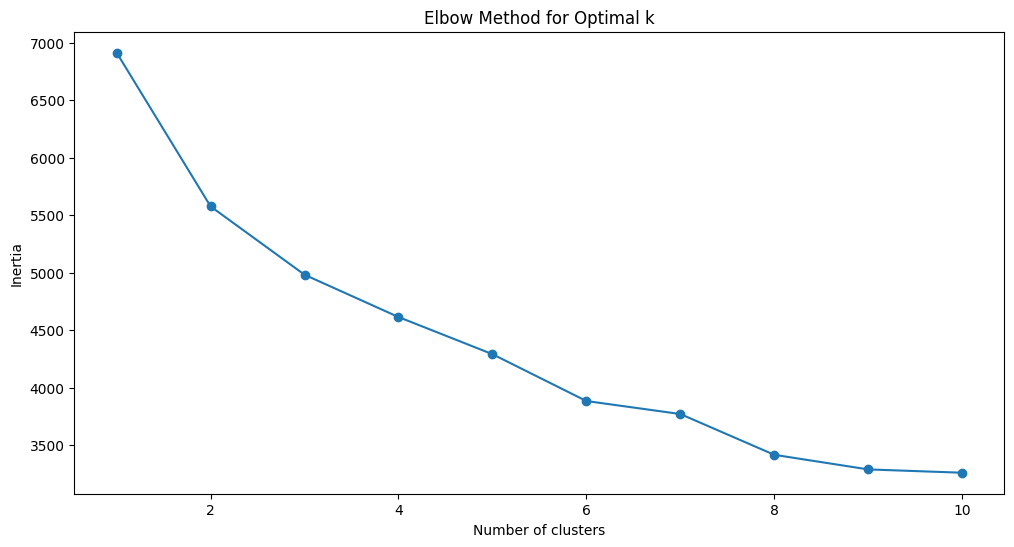

In [28]:
# K-Means Clustering
SSE = []
for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [29]:
# Assuming optimal k from the elbow method (e.g., k=2)
optimal_k = 2 # Replace with the optimal k found from the elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)
data['kmeans_cluster'] = kmeans.labels_

In [30]:
# Agglomerative Clustering
ag = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
data['agglom_cluster'] = ag.fit_predict(scaled_data)

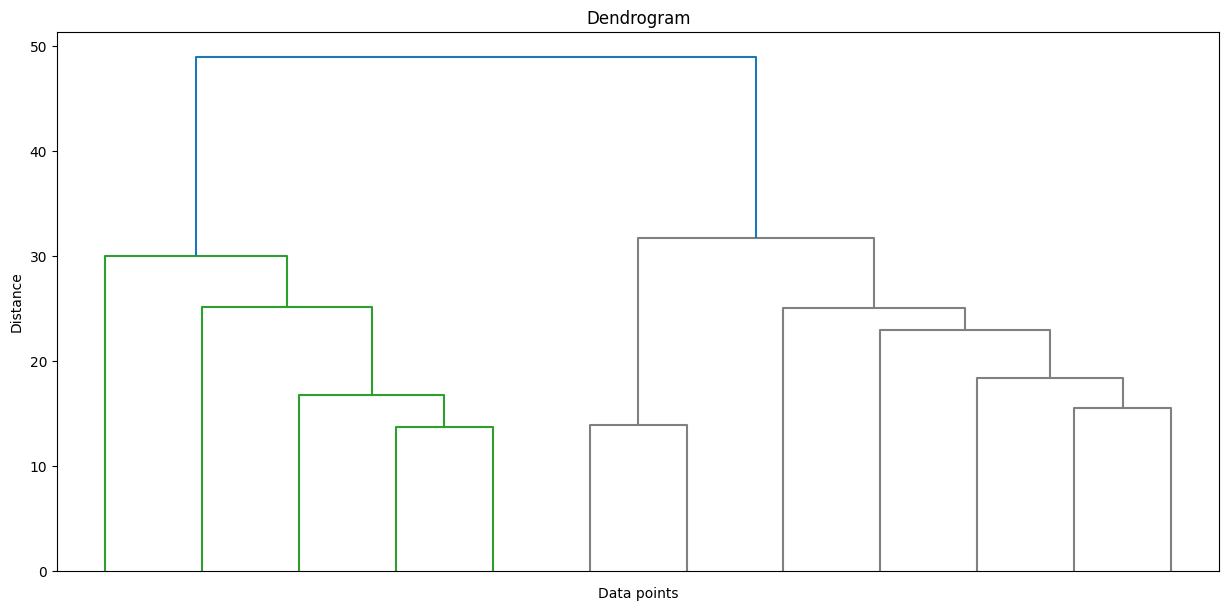

In [31]:
# Dendrogram Visualization
Z = hierarchy.linkage(scaled_data, method='ward')
plt.figure(figsize=(15, 7))
hierarchy.dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


In [32]:
# Compare Results (Example: Cross-tabulation)
print("\nK-Means Cluster Distribution:\n", data['kmeans_cluster'].value_counts())
print("\nAgglomerative Cluster Distribution:\n", data['agglom_cluster'].value_counts())

ct = pd.crosstab(data['kmeans_cluster'], data['agglom_cluster'])
print("\nCross-tabulation of K-Means and Agglomerative Clusters:\n", ct)


K-Means Cluster Distribution:
 kmeans_cluster
1    429
0    339
Name: count, dtype: int64

Agglomerative Cluster Distribution:
 agglom_cluster
1    422
0    346
Name: count, dtype: int64

Cross-tabulation of K-Means and Agglomerative Clusters:
 agglom_cluster    0    1
kmeans_cluster          
0               302   37
1                44  385


#### Conclusion
In this exercise, we investigated how clustering, which groups related spending patterns, can highlight trends in consumer behavior. Based on their yearly purchases, we were able to classify wholesale customers using both K-Means and Agglomerative Clustering. In order to maintain the significance of the results and prevent overcomplication, the elbow approach assisted us in determining the ideal number of clusters. Similar to a family tree of spending habits, the dendrogram also provided us with a clear image of the relationships between various client groupings. Businesses could use the insightful information this clustering technique offers to better target their marketing and inventory planning to each distinct client group.